<a href="https://colab.research.google.com/github/ronaldobonilla/Lab4-ConvNet-16001316/blob/master/Lab4_ConvNet_16001316.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist #Usaremos el dataset de Mnist de los dígitos escritos a mano

import os
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

Cargamos el dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


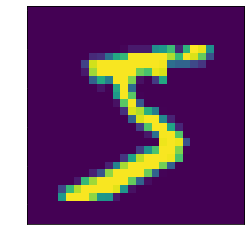

In [7]:
plt.imshow(X_train[0])

Modificamos el dataset para que se adapte a nuestro modelo

In [0]:
#60000 images, size 28x28, greyscale
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [9]:
from keras.utils import to_categorical
#one-hot encode
#Por cada categoria se crea un arreglo de valores binarios, donde un 1
#aparece en la posición que hace match con la categoría correspondiente
#En este caso aparece un 1 en la 6a posición, porque es la que corresponde al numero 5
#de la imagen de arriba.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Build the model

In [0]:

model = Sequential()
#Agregamos las capas convolucionales
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))#kernel_size son las dimensiones de la matriz del filtro (3x3)
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


# Entrenamos el modelo

In [16]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0823 - val_accuracy: 0.9766
Epoch 2/4
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0938 - val_accuracy: 0.9762
Epoch 3/4
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0963 - val_accuracy: 0.9800
Epoch 4/4
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.1344 - val_accuracy: 0.9750


## Probamos el modelo

In [17]:
#Desplegamos el arreglo de probabilidades para los primeros 4 ejemplos de dataset de pruebas
model.predict(X_test[:4])

array([[1.8906712e-16, 2.6556833e-26, 2.2690522e-16, 2.4664295e-14,
        1.2347072e-24, 1.2785884e-18, 1.5903092e-30, 1.0000000e+00,
        8.0507654e-20, 4.4146150e-15],
       [2.9898693e-16, 5.9196337e-15, 1.0000000e+00, 2.2972523e-17,
        3.4490369e-29, 1.5342502e-26, 1.3470500e-14, 4.6452154e-33,
        2.4748799e-17, 1.7831873e-25],
       [2.4740366e-12, 1.0000000e+00, 3.3929701e-09, 5.3306282e-16,
        5.4538575e-08, 3.9432351e-08, 4.9543859e-15, 2.4144495e-12,
        2.1092731e-08, 6.6827979e-14],
       [1.0000000e+00, 1.2088681e-33, 2.7132403e-20, 8.7007729e-27,
        1.4756408e-21, 4.9591546e-21, 1.4544012e-18, 9.8635657e-25,
        8.9680755e-25, 3.1369064e-17]], dtype=float32)

In [18]:
#Verificamos que las predicciones coincidan con los valores verdaderos
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Como pudimos observar, obtuvimos un accuracy del 99% luego de entrenar al modelo
Y en las pruebas acertó en los 4 ejemplos con un 100% de certeza.